# Loan Approval Prediction



# Problem Statement

# Business Problem
"Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers."

Loan prediction is a very common real-life problem that every retail bank faces in their lending operations. If the loan approval process is automated, it can save a lot of man hours and improve the speed of service to the customers. The increase in customer satisfaction and savings in operational costs are significant. However, the benefits can only be reaped if the bank has a robust model to accurately predict which customer's loan it should approve and which to reject, in order to minimize the risk of loan default.

# Translate Business Problem into Data Science / Machine Learning problem
This is a classification problem where we have to predict whether a loan will be approved or not. Specifically, it is a binary classification problem where we have to predict either one of the two classes given i.e. approved (Y) or not approved (N). Another way to frame the problem is to predict whether the loan will likely to default or not, if it is likely to default, then the loan would not be approved, and vice versa. The dependent variable or target variable is the Loan_Status, while the rest are independent variable or features. We need to develop a model using the features to predict the target variable.



***
# <a name="hypothesis">Hypothesis Generation</a>
Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome i.e. which of the features will have an impact on whether a loan will be approved or not. Some of the hypothesis are: 

- Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
- Income: Applicants with higher income should have more chances of loan approval
- Loan amount: If the loan amount is less, the chances of loan approval should be high
- Loan term: Loans with shorter time period should have higher chances of approval
- Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
- Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high
- And so on

Some of the hypothesis seem intuitive while others may not. We will try to validate each of these hypothesis based on the dataset.



***
# <a name="eda">Exploratory Data Analysis (EDA)</a>
We will use Python to explore the data in order to gain a better understanding of the features and target variable. We will also analyze the data to summarize their main characteristics, using various visualization techniques. 

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# load the train and test dataset
df = pd.read_csv("loan_train_data.csv")
df_test = pd.read_csv("loan_test_data.csv")

In [7]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = df.copy()
test_original = df_test.copy()

In [8]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
# show the shape of the dataset i.e. no of rows, no of columns
df.shape, df_test.shape

((614, 13), (367, 12))

In [11]:
# calculate train-test-split ratio
df.shape[0]/(df.shape[0]+df_test.shape[0]), df_test.shape[0]/(df.shape[0]+df_test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [12]:
# take a look at the features in the dataset
df.columns, df_test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [13]:
# show the data types for each column of the train set
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
# summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [16]:
# As Loan_ID column is not important fot model building, we will drop this column
df=df.drop(columns=['Loan_ID'])
df_test=df_test.drop(columns=['Loan_ID'])

# Univariate Analysis

### Target Variable (Categorical) Analysis
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [19]:
# count of each category in that variable
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [20]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

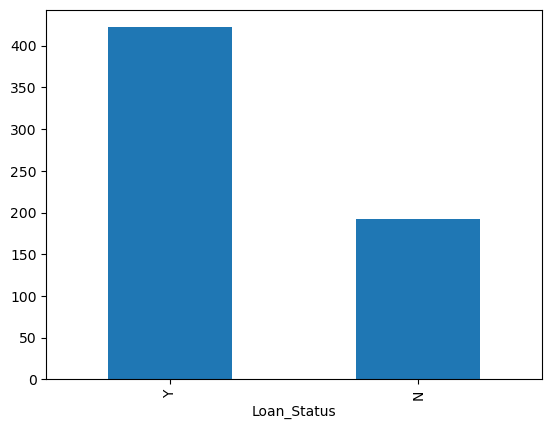

In [21]:
# bar plot to visualize the frequency
df['Loan_Status'].value_counts().plot.bar()

**Note: ** The loan of 422 (around 69%) people out of 614 was approved.

### Independent Variable (Categorical) Analysis
There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

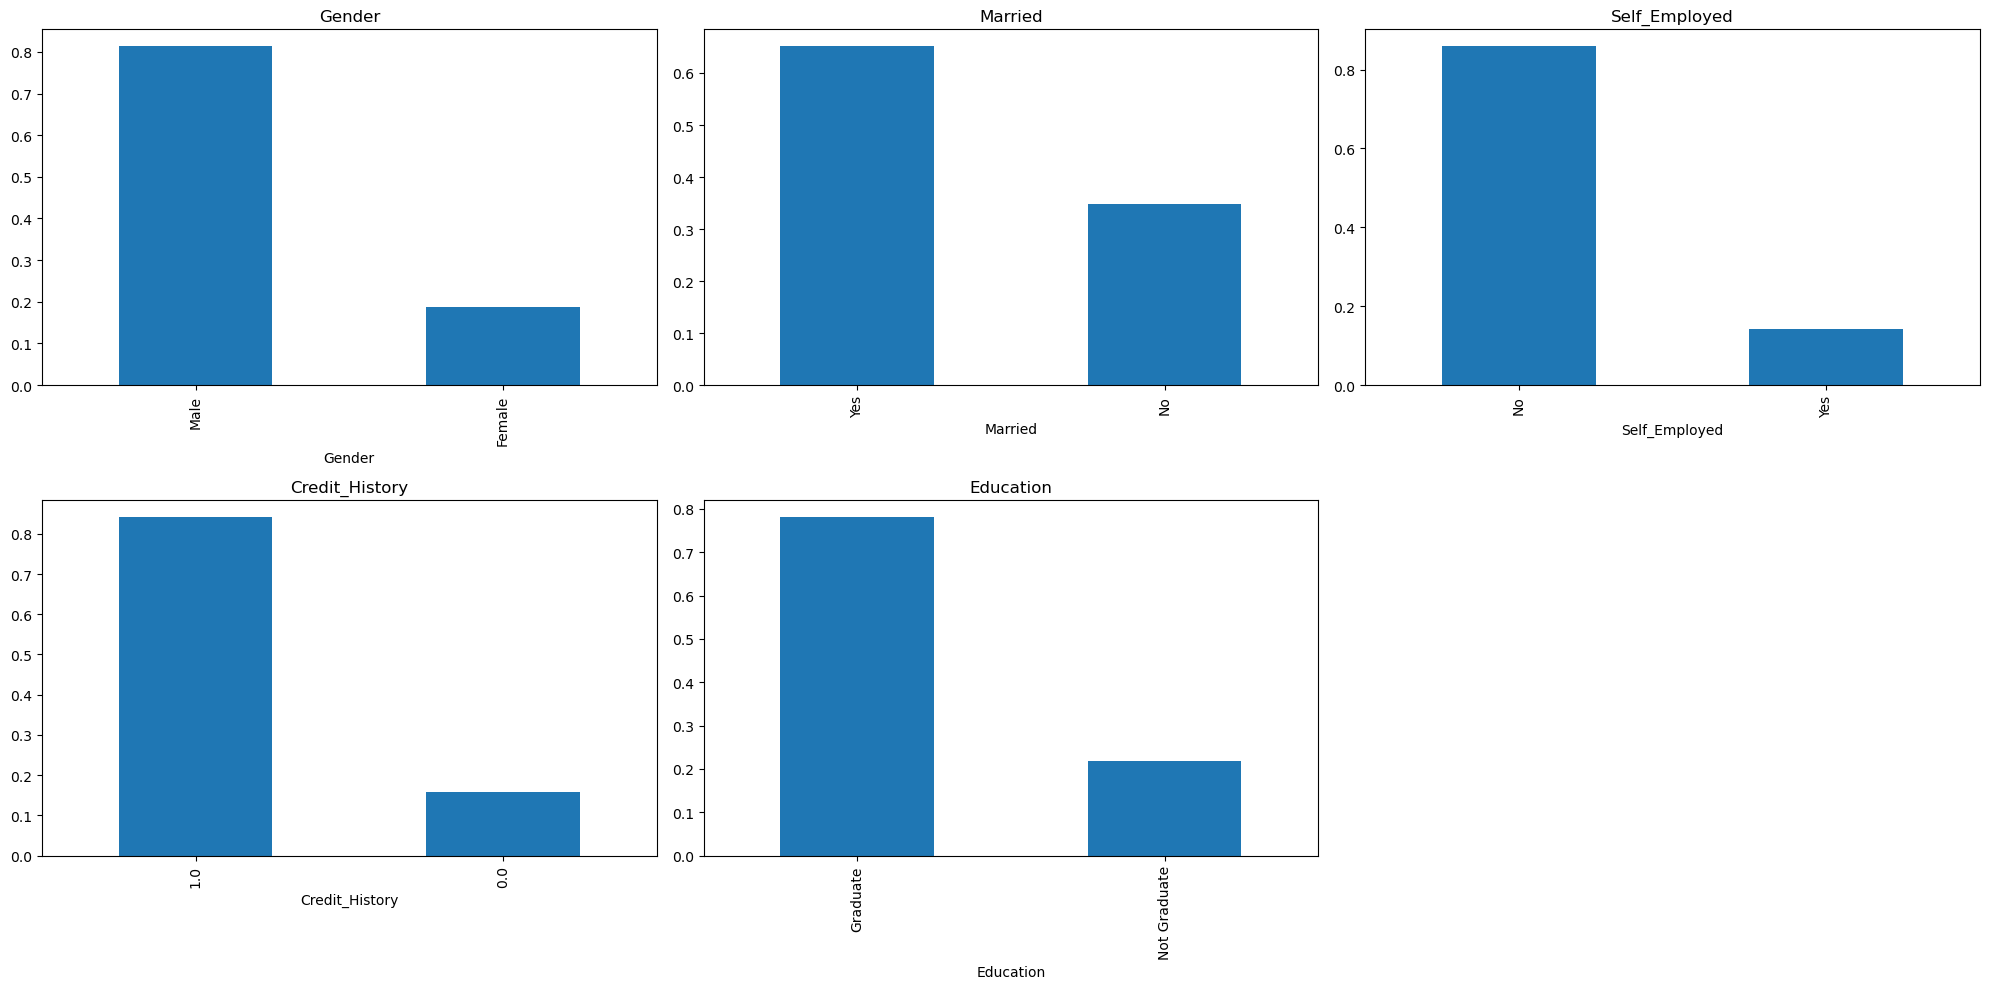

In [24]:
# Visualizing categorical Independent features
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.tight_layout()
plt.show()

As per above bar charts we can say that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have credit history (repaid their debts).
- Around 80% of the applicants are Graduate.


### Independent Variable (Ordinal) Analysis
There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

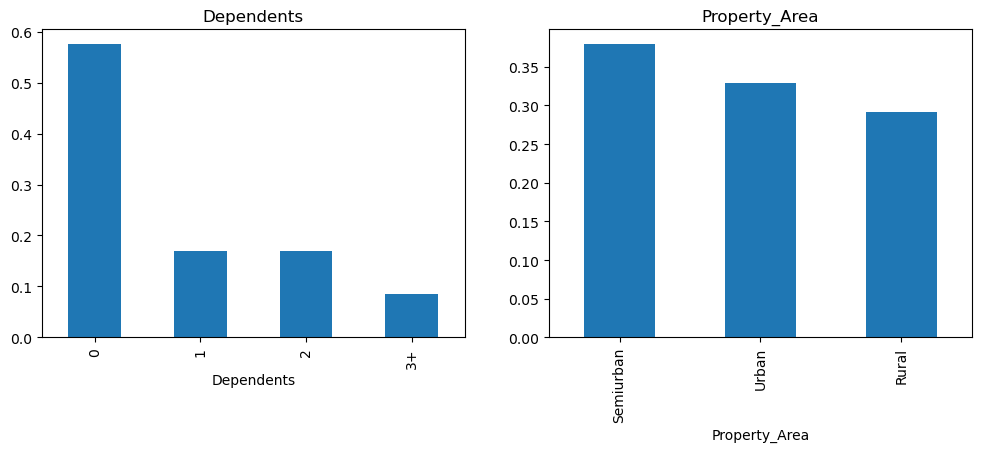

In [27]:
# Visualizing remaining categorical Independent features(Ordinal)
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Following insights can be made from the above bar plots:

- More than half of the applicants don’t have any dependents.
- Most of the applicants are from Semiurban area.


### Independent Variable (Numerical) Analysis
There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution:

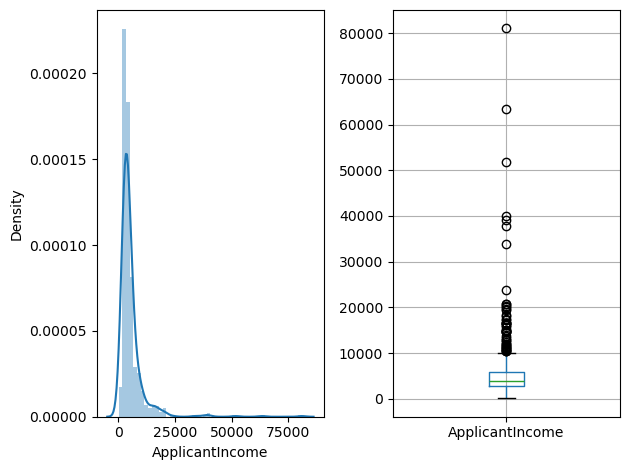

In [30]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df.boxplot(column=['ApplicantIncome'])

plt.tight_layout()
plt.show()

It can be say that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

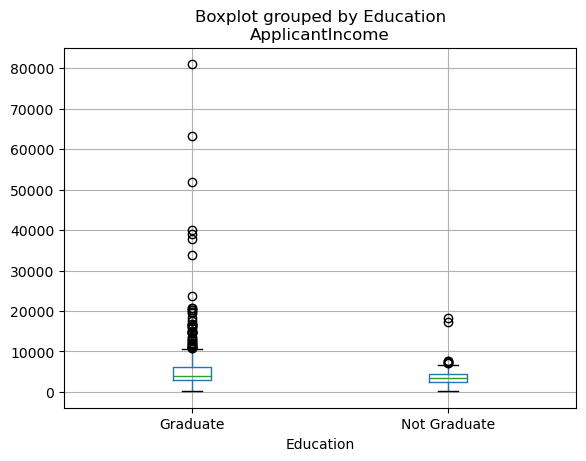

In [32]:
df.boxplot(column='ApplicantIncome', by = 'Education')


We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Secondly, Let’s look at the Coapplicant income distribution.

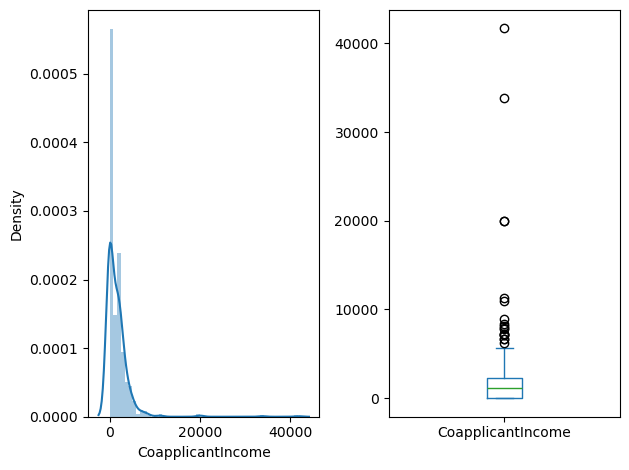

In [35]:
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box()

plt.tight_layout()
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Thirdly, let’s look at the distribution of LoanAmount variable.

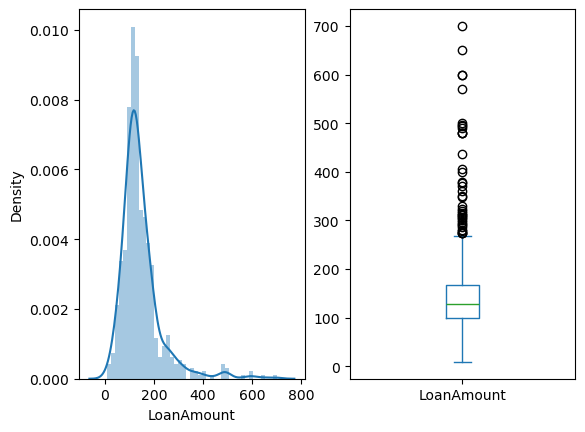

In [37]:
plt.subplot(121)
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box()

plt.show()

We see a right-skewed distribution for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [39]:
# frequency table of a Loan_Amount_Term variable
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: title={'center': 'Loan_Amount_Term'}, xlabel='Loan_Amount_Term'>

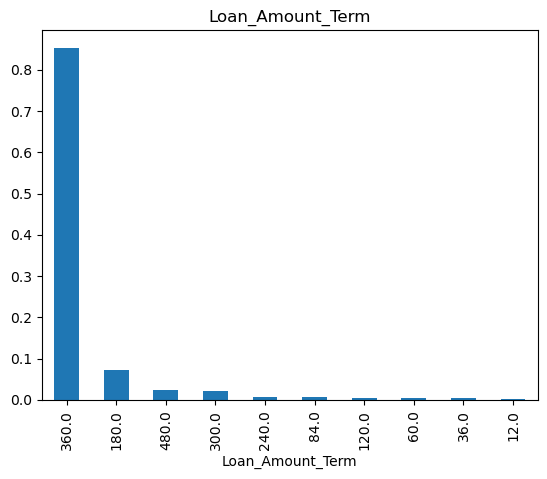

In [40]:
# plot bar chart
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

we can see from the above bar plot that:

- Around 85% of the loans are 360 months term or 30 years period


Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

## Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.



**Categorical Independent Variable vs Target Variable**

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


Text(0, 0.5, 'Percentage')

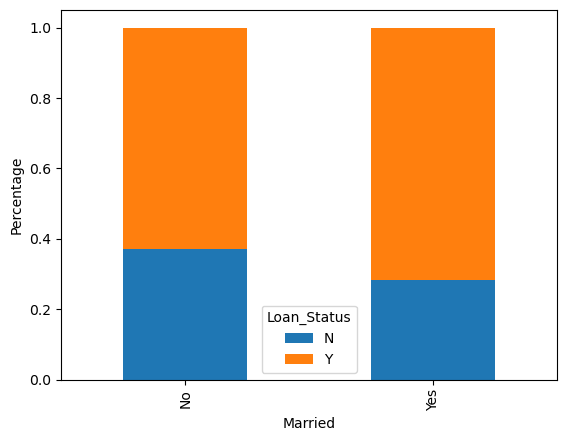

In [44]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Married')
plt.ylabel('Percentage')


Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


Text(0, 0.5, 'Percentage')

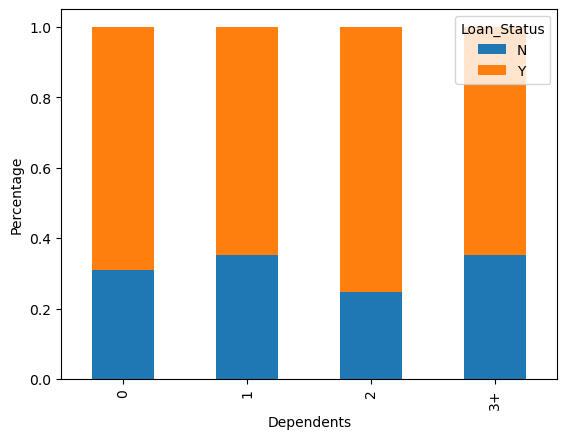

In [45]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


Text(0, 0.5, 'Percentage')

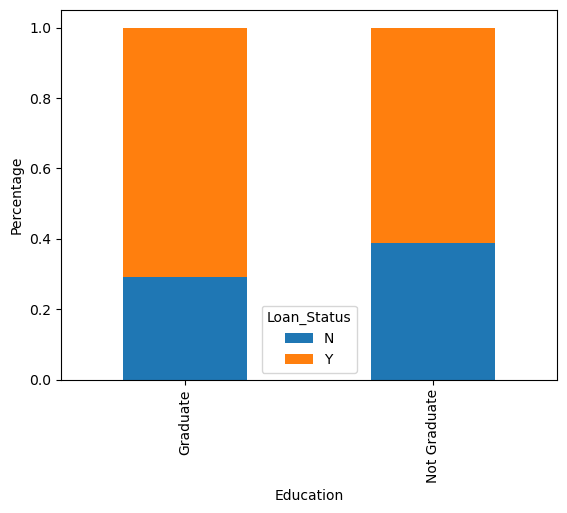

In [46]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Education')
plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


Text(0, 0.5, 'Percentage')

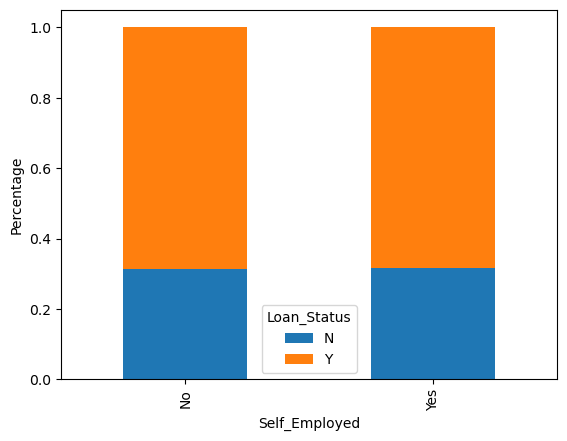

In [47]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Self_Employed')
plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


Text(0, 0.5, 'Percentage')

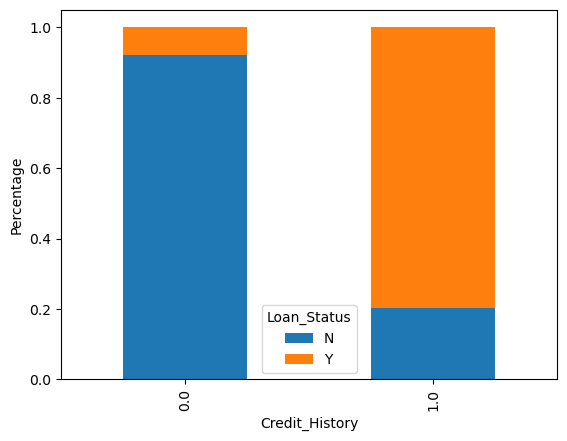

In [48]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Credit_History')
plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


Text(0, 0.5, 'Percentage')

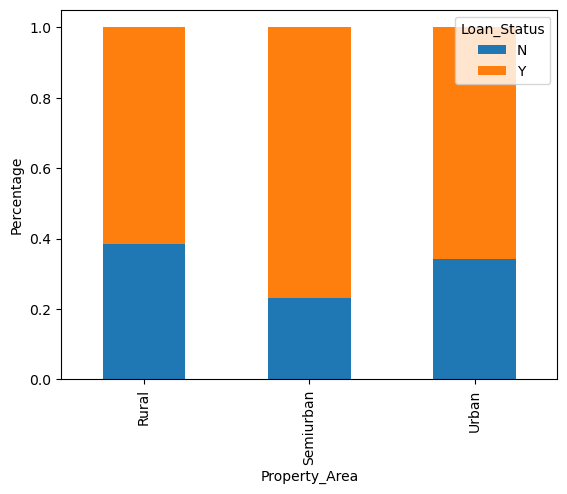

In [49]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
plt.ylabel('Percentage')

From the bar charts above:
- proportion of male and female applicants is more or less same for both approved and unapproved loans
- proportion of married applicants is higher for the approved loans
- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
- there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- proportion of loans getting approved for graduates is higher compared to non-graduates
- it seems people with credit history as 1 are more likely to get their loans approved
- proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.


In [51]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [52]:
# replacing 3+ in Dependents variable with 3 for both train and test dataset
df['Dependents'].replace('3+', 3, inplace=True)
df_test['Dependents'].replace('3+', 3, inplace=True)

In [53]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['Loan_Status'].replace(['N','Y'], [0,1], inplace=True)


In [54]:
# check the dataset
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# EDA

## Missing value and outlier treatment
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

### Missing value imputation

Let’s list out feature-wise count of missing values.

In [57]:
# check for missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 50% missing values in it, then we would drop the variable from the dataset.

In [59]:
# replace missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [61]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [63]:
# replace missing value with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [65]:
# replace missing values with the median value due to outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [66]:
# check whether all the missing values are filled in the Train dataset
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach. 


In [68]:
# replace missing values in Test set with mode/median from Training set
df_test['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [69]:
# check whether all the missing values are filled in the Test dataset
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

As we can see that all the missing values have been filled in the Test dataset.



### Outlier Treatment 

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

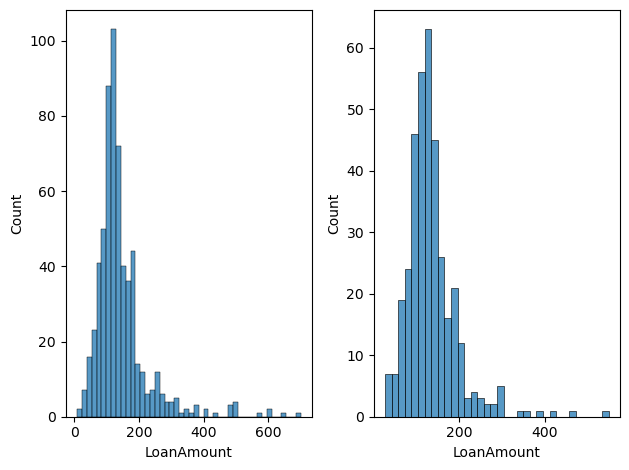

In [72]:
# before log transformation
plt.subplot(121)
sns.histplot(data=df,x='LoanAmount')

plt.subplot(122)
sns.histplot(data=df_test,x='LoanAmount')

plt.tight_layout()

In [73]:
# Removing skewness in LoanAmount variable by log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

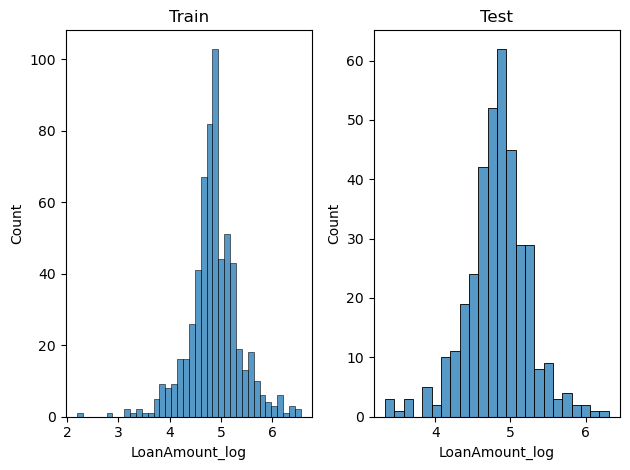

In [74]:
# after log transformation

plt.subplot(121)
sns.histplot(data=df,x='LoanAmount_log')
plt.title("Train")

plt.subplot(122)
sns.histplot(data=df_test,x='LoanAmount_log')
plt.title("Test")
plt.tight_layout()

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

In [76]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [77]:
df.select_dtypes(exclude='number')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


changing column data type of Dependents from object to int

In [79]:
df['Dependents']=df['Dependents'].astype('int')
df_test['Dependents']=df_test['Dependents'].astype('int')

In [80]:
df.select_dtypes(exclude='number')

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban
...,...,...,...,...,...
609,Female,No,Graduate,No,Rural
610,Male,Yes,Graduate,No,Rural
611,Male,Yes,Graduate,No,Urban
612,Male,Yes,Graduate,No,Urban


Now lets look at the correlation between all the numerical variables. We can use the `corr()` to compute pairwise correlation of columns. Then we will use the heat map to visualize the correlation.

<Axes: >

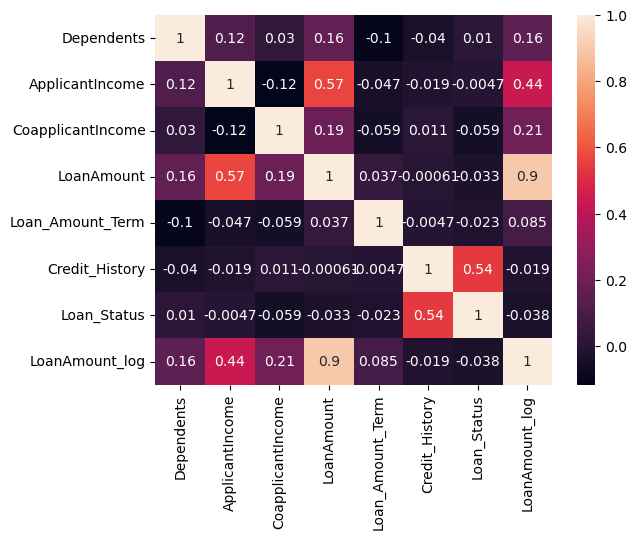

In [82]:
# calculate and visualize correlation matrix
df.select_dtypes(include='number').corr()
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

 We see that the most correlated variables are 
- (ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
- (Credit_History - Loan_Status) with correlation coefficient of 0.56
- LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

# Encoding
Encoding means converting categorical cloumn into numeric column

we are using Pandas get dummies function for encoding purpose

In [86]:
df=pd.get_dummies(df,columns=df.select_dtypes(exclude='number').columns,dtype='int')

In [87]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,1,1,0,1,0,0,0,1


In [88]:
df_test=pd.get_dummies(df_test,columns=df_test.select_dtypes(exclude='number').columns,dtype='int')

In [89]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,1,0,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,1,0,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,1,0,1,0,0,0,1
3,2,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,1,0,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777,113.0,360.0,1.0,4.727388,0,1,0,1,0,1,0,1,0,0,1
363,0,4158,709,115.0,360.0,1.0,4.744932,0,1,0,1,1,0,1,0,0,0,1
364,0,3250,1993,126.0,360.0,1.0,4.836282,0,1,1,0,1,0,1,0,0,1,0
365,0,5000,2393,158.0,360.0,1.0,5.062595,0,1,0,1,1,0,1,0,1,0,0


In [91]:
# Dividing data into x & y that is target and indepedent feature
x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

In [92]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,1,0,1,0,0,0,1


### Scalling

Scalling is a process to convert all data into same unit, so model will treat all data as same for it.
fro saclling we are using Standad Scaler from sklearn library.

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scalled_x=sc.fit_transform(x)


In [96]:
scalled_x

array([[-0.73780632,  0.07299082, -0.55448733, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [ 0.25346957, -0.13441195, -0.03873155, ...,  1.55889948,
        -0.7820157 , -0.70020801],
       [-0.73780632, -0.39374734, -0.55448733, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.25346957,  0.43717437, -0.47240418, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [ 1.24474546,  0.35706382, -0.55448733, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [-0.73780632, -0.13441195, -0.55448733, ..., -0.64147818,
         1.2787467 , -0.70020801]])

In [97]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Model Development and Evaluation


We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

We are using four differnt algorithms:
1.Logestic Regression
2.Random Forest
3.XGBoost
4.Decision Tree

#### The Process of Modeling the Data:
Importing the model

Fitting the model

Predicting Loan Status

Classification report by Loan Status

Overall accuracy

In [194]:
#Importing required algorithms and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### 1.Logestic Regression

In [190]:
LR = LogisticRegression()
lr_model=LR.fit(xtrain, ytrain)

ypred = lr_model.predict(xtest)

#  prediction Summary by species
print(classification_report(ytest, ypred))

# Accuracy score
accuracy_score(ypred,ytest)
print(f"accuracy is {round(accuracy_score(ypred,ytest)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

    accuracy                           0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185

accuracy is 79.46% Accurate


So our predictions are over 79% accurate, i.e. we have identified 79% of the loan status correctly.

### 2.Random Forest

In [188]:
rfc = RandomForestClassifier()
rfc_model=rfc.fit(xtrain, ytrain)

ypred = rfc_model.predict(xtest)

#  prediction Summary by species
print(classification_report(ytest, ypred))

# Accuracy score
accuracy_score(ypred,ytest)
print(f"accuracy is {round(accuracy_score(ypred,ytest)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.74      0.46      0.57        61
           1       0.78      0.92      0.84       124

    accuracy                           0.77       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185

accuracy is 76.76% Accurate


So our predictions are over 77% accurate, i.e. we have identified 77% of the loan status correctly.

### XGBoost

In [186]:
xgb = XGBClassifier()
xgb_model=xgb.fit(xtrain, ytrain)

ypred = xgb_model.predict(xtest)

#  prediction Summary by species
print(classification_report(ytest, ypred))

# Accuracy score
accuracy_score(ypred,ytest)
print(f"accuracy is {round(accuracy_score(ypred,ytest)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.65      0.46      0.54        61
           1       0.77      0.88      0.82       124

    accuracy                           0.74       185
   macro avg       0.71      0.67      0.68       185
weighted avg       0.73      0.74      0.73       185

accuracy is 74.05% Accurate


In [ ]:
So our predictions are over 74% accurate, i.e. we have identified 74% of the loan status correctly.

### 4.Decision Tree

In [184]:
dt = DecisionTreeClassifier()
dt_model=dt.fit(xtrain, ytrain)

ypred = dt_model.predict(xtest)

#  prediction Summary by species
print(classification_report(ytest, ypred))

# Accuracy score
accuracy_score(ypred,ytest)
print(f"accuracy is {round(accuracy_score(ypred,ytest)*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.58      0.59      0.59        61
           1       0.80      0.79      0.79       124

    accuracy                           0.72       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.73      0.72      0.72       185

accuracy is 72.43% Accurate


So our predictions are over 72% accurate, i.e. we have identified 72% of the loan status correctly.

In [196]:
# Let's use logestic regression model to return predicted values for test data

In [198]:
test_predict=lr_model.predict(df_test)

In [202]:
test_predict.shape

(367,)

In [206]:
submission = pd.read_csv("loan_test_data.csv")

In [208]:
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = pred_test

In [210]:
# replace with "N" and "Y"
submission['Loan_Status'].replace([0,1], ['N','Y'], inplace=True)

In [212]:
# convert to CSV file, without row index
submission.to_csv('logistic.csv', index=False)


## Conclusion

After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic Regression (79.46%), followed by RandomForest (76.76%) and XGBoost (74.05), and Decision Tree performed the worst (72.43%). On the whole, a logistic regression classifier provides the best result in terms of accuracy for the given dataset, without any feature engineering needed. Because of its simplicity and the fact that it can be implemented relatively easy and quick, Logistic Regression is often a good baseline that data scientists can use to measure the performance of other more complex algorithms. In this case, however, a basic Logistic Regression has already outperformed other more complex algorithms like Random Forest and XGBoost, for the given dataset.

